In [1]:
import pandas as pd
import numpy as np
from astropy.io import fits
import seaborn as sns

# 3FHL catalog
from http://www.ssdc.asi.it/fermi3fhl/
(you can also download it as txt file .... I just noticed that too late)

In [2]:
with fits.open("gll_psch_v13.fit") as f:
    #single out the redshift, if wanted
    #redshifts = f[1].data["Redshift"]
    
    #define some column names to be loaded from file
    # columns can be looked at with:
    # print(f[1].data.dtype.names)
    # warning: some of the columns contain arrays, which then don't play nice with the pandas table
    # but they are not in this list below
    df_cols = ['Source_Name', 'RAJ2000', 'DEJ2000', 'Redshift', 'Pivot_Energy', 'Flux_Density', 'Unc_Flux_Density', 
               'Flux', 'Unc_Flux', 'Energy_Flux', 'Unc_Energy_Flux',
               'Signif_Curve', 'SpectrumType', 'Spectral_Index', 'Unc_Spectral_Index', 'beta', 'Unc_beta', 
               'PowerLaw_Index', 'Unc_PowerLaw_Index',
               'CLASS'
              ]
    # separate catalog into data with and without redshift information
    out_df_rs = pd.DataFrame(columns = df_cols)
    out_df = pd.DataFrame(columns = df_cols)
    for d in f[1].data:
        # redshift not NaN
        if np.isfinite(d["Redshift"]): 
            # get all entries for all columns
            xdata = [d[atr] for atr in df_cols]    
            out_df_rs = out_df_rs.append(pd.Series(xdata, index=df_cols), 
                               ignore_index=True)
        else:
            xdata = [d[atr] for atr in df_cols]    
            out_df = out_df.append(pd.Series(xdata, index=df_cols), 
                               ignore_index=True)

In [3]:
# TXS 0506+056
out_df[out_df.Source_Name=="3FHL J0509.4+0542"]

,Source_Name,RAJ2000,DEJ2000,Redshift,Pivot_Energy,Flux_Density,Unc_Flux_Density,Flux,Unc_Flux,Energy_Flux,Unc_Energy_Flux,Signif_Curve,SpectrumType,Spectral_Index,Unc_Spectral_Index,beta,Unc_beta,PowerLaw_Index,Unc_PowerLaw_Index,CLASS
209,3FHL J0509.4+0542,77.363625,5.706592,NaN,21.446362,9.024403e-12,8.929053e-13,4.007241e-10,3.965564e-11,2.017411e-11,3.283848e-12,1.206573,PowerLaw,2.16159,0.211574,0.161166,0.144337,2.333805,0.133023,bll


# swift-bob catalog 
from https://swift.gsfc.nasa.gov/results/bs105mon/

In [6]:
bat = pd.read_csv("BAT_105m_catalog_07jul2019.txt", sep="|", skipinitialspace=True, comment="#") # it has a nasty style of separation

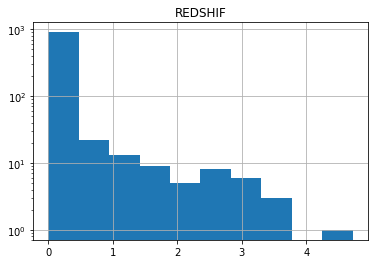

In [7]:
ax = bat.hist("REDSHIF") # REDSHIF   .... T .... :D
ax[0][0].set_yscale("log")

# SBG  
downloaded from https://iopscience.iop.org/article/10.1088/0004-637X/755/2/164#apj435974t1

In [10]:
sbg = pd.read_csv("SBG_apj435974t1_ascii.txt", skiprows=3, sep="\t", skipfooter=2, engine="python", comment="#")

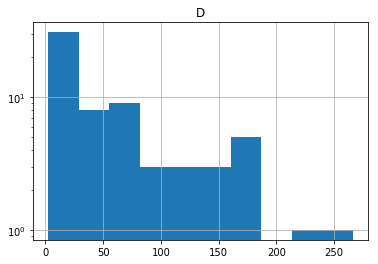

In [11]:
ax = sbg.hist("D")
ax[0][0].set_yscale("log")